# Objective
Potholes on roads pose a risk to people's lives and is a critical issue to address. Since waterlogging is the root cause of pothole formation, particularly in monsoons, it becomes essential to locate and fill those potholes. But manually tracking them down is a job on its own. Machine learning can help us to track down and perform most of the intensive work here.

In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import time
import os
from tqdm import tqdm
%matplotlib inline

In [2]:
# data_dir is the location of the dataset
data_dir = "C:/Users/NIJITH KURUP/Desktop/Folders/NMIMS files/MVA project/pothole-detection-dataset"

# categories is the classes
categories = ["normal","potholes"]

# IMG_SIZE is the required size for the images 
IMG_SIZE = 224

In [3]:
# Creating a function that will iterate inside the directory and will also attach the the encoded labels to each image 
# and create the data. There are 352 normal images and 329 images of potholes

training_data = []

def create_training_data():
    for category in categories:  # do normal and potholes

        path = os.path.join(data_dir,category)  # create path to normal and potholes
        class_num = categories.index(category)  # get the classification  (0 or a 1). 0=normal 1=potholes

        for img in tqdm(os.listdir(path)):  # iterate over each image per normal and potholes
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.COLOR_BGR2RGB)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size since images are varying in size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass

create_training_data()

100%|████████████████████████████████████████████████████████████████████████████████| 329/329 [00:09<00:00, 36.34it/s]


In [5]:
# Now we've created our data, but the problem is that 352 images belonging to the "0" class arrive first,
# and then the "1" class images. So we'll shuffle the images. 
import random

random.shuffle(training_data)

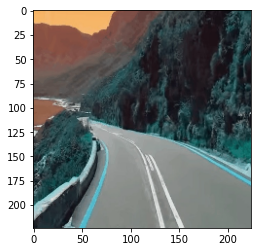

In [6]:
for sample in training_data[:10]:
    plt.imshow(sample[0])

In [7]:
# Seperating the pixel values and its respective class into  X and y where each individual pixel value 
# acts as a feature of the image
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 3))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

[[[[110]
   [101]
   [104]
   ...
   [ 76]
   [131]
   [136]]

  [[137]
   [ 73]
   [ 76]
   ...
   [140]
   [140]
   [118]]

  [[124]
   [123]
   [151]
   ...
   [ 78]
   [ 82]
   [ 77]]

  ...

  [[180]
   [168]
   [175]
   ...
   [ 78]
   [ 88]
   [ 98]]

  [[ 60]
   [ 79]
   [ 92]
   ...
   [106]
   [ 83]
   [ 95]]

  [[105]
   [ 64]
   [ 77]
   ...
   [136]
   [124]
   [145]]]


 [[[145]
   [133]
   [150]
   ...
   [ 75]
   [ 85]
   [ 95]]

  [[ 74]
   [ 90]
   [103]
   ...
   [106]
   [ 79]
   [ 91]]

  [[101]
   [ 58]
   [ 70]
   ...
   [ 94]
   [ 82]
   [107]]

  ...

  [[106]
   [111]
   [105]
   ...
   [169]
   [181]
   [157]]

  [[169]
   [182]
   [166]
   ...
   [146]
   [137]
   [133]]

  [[137]
   [133]
   [132]
   ...
   [132]
   [130]
   [127]]]


 [[[122]
   [113]
   [105]
   ...
   [165]
   [178]
   [154]]

  [[170]
   [185]
   [165]
   ...
   [132]
   [123]
   [119]]

  [[135]
   [131]
   [130]
   ...
   [155]
   [148]
   [156]]

  ...

  [[122]
   [118]
   [117]
   

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
# Splitting the data into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=544)

In [10]:
len(X_train)

544

In [12]:
# Since each pixel value ranges between 0-255, we'll divide each pixel value by 255 so that he values range between 0 and 1
X_train = X_train/255.0
X_test = X_test/255.0

In [13]:
# Importing few stuffs from keras that will be used in creating the model
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.models import Sequential

Using TensorFlow backend.


In [14]:
# Creating a CNN model
model = Sequential()

model.add(Conv2D(filters = 96, input_shape = (224, 224, 3), kernel_size = (3, 3), strides = (2, 2), padding = 'valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))
    
model.add(Conv2D(filters = 256,  kernel_size = (3, 3), strides = (2, 2), padding = 'valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (1, 1), padding = 'valid'))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
    
model.add(Dense(256))
model.add(Activation('relu'))
    
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 111, 111, 96)      2688      
_________________________________________________________________
activation_1 (Activation)    (None, 111, 111, 96)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 55, 55, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 27, 256)       221440    
_________________________________________________________________
activation_2 (Activation)    (None, 27, 27, 256)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 256)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 173056)           

In [16]:
# From the model summary we can see that there are in all about 89m parameters.
# Fitting the model with a batch size of 76 and running for 7 epochs
# I'm going for 7 epochs because going beyond 7 epochs the model tends to overfit and 7 was just the sweet spot
cnn = model.fit(X_train, y_train, batch_size=76, epochs=7, validation_split=0.3, verbose = 1)

Train on 380 samples, validate on 164 samples
Epoch 1/7
380/380 [==============================] - 13s 34ms/step - loss: 4.1802 - accuracy: 0.5184 - val_loss: 0.6488 - val_accuracy: 0.6098
Epoch 2/7
380/380 [==============================] - 12s 31ms/step - loss: 0.6850 - accuracy: 0.6132 - val_loss: 0.6344 - val_accuracy: 0.6524
Epoch 3/7
380/380 [==============================] - 12s 32ms/step - loss: 0.5856 - accuracy: 0.7289 - val_loss: 0.4434 - val_accuracy: 0.8659
Epoch 4/7
380/380 [==============================] - 12s 32ms/step - loss: 0.4576 - accuracy: 0.7921 - val_loss: 0.4241 - val_accuracy: 0.8232
Epoch 5/7
380/380 [==============================] - 14s 36ms/step - loss: 0.3831 - accuracy: 0.8211 - val_loss: 0.2938 - val_accuracy: 0.8598
Epoch 6/7
380/380 [==============================] - 15s 40ms/step - loss: 0.2918 - accuracy: 0.8763 - val_loss: 0.2961 - val_accuracy: 0.8780
Epoch 7/7
380/380 [==============================] - 15s 40ms/step - loss: 0.2004 - accuracy: 0.

In [17]:
# After evaluating on testing data we can see that it gave us an accuracy of 92.64% which is awesome considering the fact
# that we'd extremely low number of images to train data on
model.evaluate(X_test,y_test)

136/136 [==============================] - 1s 10ms/step


[0.18993388992898605, 0.9264705777168274]

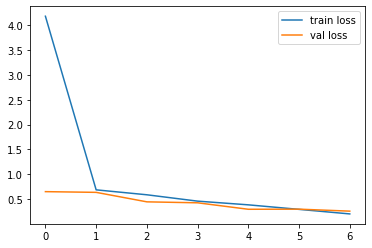

In [18]:
# Loss Plot
plt.plot(cnn.history['loss'], label='train loss')
plt.plot(cnn.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# In the below loss curve we can see that both train and validation loss are decreasing but at the very last epoch
# we can see that they were starting to diverge a bit

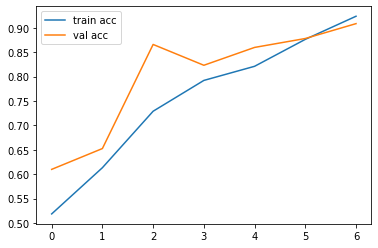

In [19]:
# accuracy plot
plt.plot(cnn.history['accuracy'], label='train acc')
plt.plot(cnn.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

# A similar pattern is seen in the accuracy plot as well, the accuracy for both training and validation data increase
# and at 7th epoch they diverge a bit. Meaning running the model any further than 7 epochs could've resulted in overfitting.

In [20]:
classes = ["normal","potholes"]
def plot_sample(X, y, index):
    plt.figure(figsize = (5,5))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

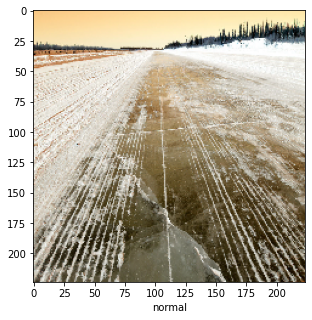

In [21]:
plot_sample(X_test,y_test,20)

In [22]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [23]:
from sklearn.metrics import roc_curve, roc_auc_score
r_probs = [0 for _ in range(len(y_test))]
r_auc = roc_auc_score(y_test, r_probs)
train_auc = roc_auc_score(y_train, y_train_pred)
test_auc = roc_auc_score(y_test, y_test_pred)
print('Training data: AUC = %.3f' % (train_auc*100))
print('Test data: AUC = %.3f' % (test_auc*100))

Training data: AUC = 98.022
Test data: AUC = 98.151


In [24]:
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
train_fpr, train_tpr, _ = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, _ = roc_curve(y_test, y_test_pred)

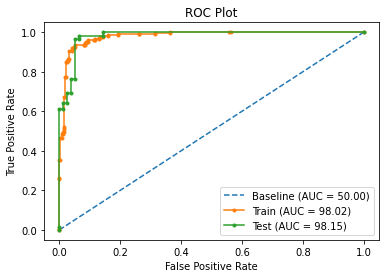

In [25]:
# Plotting the ROC curve
plt.plot(r_fpr, r_tpr, linestyle='--', label='Baseline (AUC = %0.2f)' % (r_auc*100))
plt.plot(train_fpr, train_tpr, marker='.', label='Train (AUC = %0.2f)' % (train_auc*100))
plt.plot(test_fpr, test_tpr, marker='.', label='Test (AUC = %0.2f)' % (test_auc*100))

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

# Limitations
In the notebook, you notice that I've plotted only two images. But one of this project's critical limitations is that all images in the dataset are clicked in broad daylight. An obviously, the model is trained to identify potholes in a similar scenario. One solution to resolve this would be to have more images but snapped with an infrared camera. A dataset containing images clicked with two different sensors will be more helpful because the infrared camera will snap pictures during night time.

# ========================== THE END ==========================